<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [2]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.granularity = Granularity.HOURLY

### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))
d.add_dimension(name="interface", function="X Y Z".split())
d.add_dimension(name="const",function=3)

In [4]:
d.data

,epoch,product,product_id,interface,const
2019-01-01 00:00:00,1546300800,C,756,X,3
2019-01-01 01:00:00,1546304400,A,8561,Y,3
2019-01-01 02:00:00,1546308000,D,4870,Z,3
2019-01-01 03:00:00,1546311600,C,8139,X,3
2019-01-01 04:00:00,1546315200,B,283,Y,3
...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,7741,Z,3
2019-01-11 21:00:00,1547240400,A,9646,X,3
2019-01-11 22:00:00,1547244000,A,5526,Y,3
2019-01-11 23:00:00,1547247600,C,9847,Z,3


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [5]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

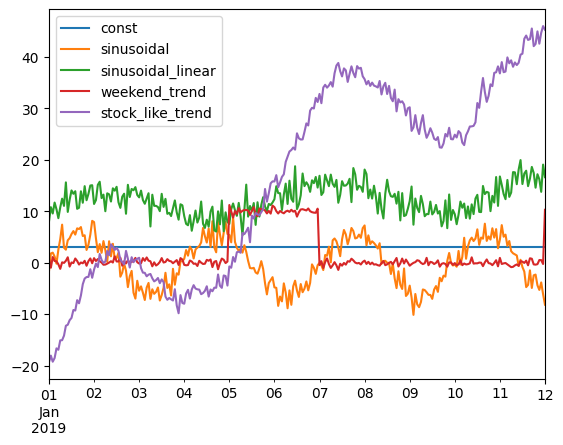

In [6]:
d.plot(exclude=['product_id'])

In [7]:
d.data

,epoch,product,product_id,interface,const,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,C,756,X,3,-1.697873,7.978122,0.754047,-19.302000
2019-01-01 01:00:00,1546304400,A,8561,Y,3,1.799787,10.805195,-0.971294,-18.045797
2019-01-01 02:00:00,1546308000,D,4870,Z,3,1.965116,9.570136,1.113938,-19.231161
2019-01-01 03:00:00,1546311600,C,8139,X,3,1.211014,11.699233,0.332980,-18.515678
2019-01-01 04:00:00,1546315200,B,283,Y,3,-0.183787,10.394182,0.295557,-16.637200
...,...,...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,7741,Z,3,-4.380851,17.202413,-0.273058,44.965072
2019-01-11 21:00:00,1547240400,A,9646,X,3,-5.278842,16.225696,0.529385,42.577584
2019-01-11 22:00:00,1547244000,A,5526,Y,3,-3.820064,13.783616,0.513581,44.701367
2019-01-11 23:00:00,1547247600,C,9847,Z,3,-6.108407,19.074607,-0.239300,45.996135


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [8]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,C,X,3,7.978122,0.754047,-19.302000
2019-01-01 01:00:00,1546304400,A,Y,3,10.805195,-0.971294,-18.045797
2019-01-01 02:00:00,1546308000,D,Z,3,9.570136,1.113938,-19.231161
2019-01-01 03:00:00,1546311600,C,X,3,11.699233,0.332980,-18.515678
2019-01-01 04:00:00,1546315200,B,Y,3,10.394182,0.295557,-16.637200
...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,Z,3,17.202413,-0.273058,44.965072
2019-01-11 21:00:00,1547240400,A,X,3,16.225696,0.529385,42.577584
2019-01-11 22:00:00,1547244000,A,Y,3,13.783616,0.513581,44.701367
2019-01-11 23:00:00,1547247600,C,Z,3,19.074607,-0.239300,45.996135


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [9]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,C,Y,3,10.951614,-0.219929,-20.629557
2019-01-01 01:00:00,1546304400,B,Z,3,7.790641,-0.242159,-20.816754
2019-01-01 02:00:00,1546308000,B,X,3,9.952594,-0.736996,-17.885047
2019-01-01 03:00:00,1546311600,B,Y,3,12.622135,0.976704,-18.006562
2019-01-01 04:00:00,1546315200,A,Z,3,9.901716,0.656756,-16.146911
...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,A,Y,3,17.169709,-0.864808,57.705137
2019-01-11 22:00:00,1547244000,A,Z,3,14.702223,-0.153560,54.527284
2019-01-11 23:00:00,1547247600,D,X,3,16.068536,0.066868,56.370890
2019-01-12 00:00:00,1547251200,B,Y,3,18.137324,10.426336,56.713548


### Adding multi dimension/metric
In case you want to add a dimensions or metrics that are linked

In [10]:
import random
def my_custom_function():
    while True:
        val1 = random.randint(1,100)
        val2 =  random.randint(1,100)
        val3 = val1 + val2
        yield (val1, val2, val3)

d.add_multi_items(names="val1 val2 val3".split(), function=my_custom_function())

    

In [11]:
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val1,val2,val3
2019-01-01 00:00:00,1546300800,C,Y,3,10.951614,-0.219929,-20.629557,94,72,166
2019-01-01 01:00:00,1546304400,B,Z,3,7.790641,-0.242159,-20.816754,62,46,108
2019-01-01 02:00:00,1546308000,B,X,3,9.952594,-0.736996,-17.885047,78,58,136
2019-01-01 03:00:00,1546311600,B,Y,3,12.622135,0.976704,-18.006562,31,27,58
2019-01-01 04:00:00,1546315200,A,Z,3,9.901716,0.656756,-16.146911,39,64,103
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,A,Y,3,17.169709,-0.864808,57.705137,63,73,136
2019-01-11 22:00:00,1547244000,A,Z,3,14.702223,-0.153560,54.527284,99,35,134
2019-01-11 23:00:00,1547247600,D,X,3,16.068536,0.066868,56.370890,24,23,47
2019-01-12 00:00:00,1547251200,B,Y,3,18.137324,10.426336,56.713548,69,15,84


In [13]:
d.add_multi_items(names="val4 val5 val6".split(), function=my_custom_function())

In [14]:
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val1,val2,val3,val4,val5,val6
2019-01-01 00:00:00,1546300800,C,Y,3,10.951614,-0.219929,-20.629557,94,72,166,20,80,100
2019-01-01 01:00:00,1546304400,B,Z,3,7.790641,-0.242159,-20.816754,62,46,108,80,60,140
2019-01-01 02:00:00,1546308000,B,X,3,9.952594,-0.736996,-17.885047,78,58,136,98,60,158
2019-01-01 03:00:00,1546311600,B,Y,3,12.622135,0.976704,-18.006562,31,27,58,98,79,177
2019-01-01 04:00:00,1546315200,A,Z,3,9.901716,0.656756,-16.146911,39,64,103,18,96,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,A,Y,3,17.169709,-0.864808,57.705137,63,73,136,12,66,78
2019-01-11 22:00:00,1547244000,A,Z,3,14.702223,-0.153560,54.527284,99,35,134,19,6,25
2019-01-11 23:00:00,1547247600,D,X,3,16.068536,0.066868,56.370890,24,23,47,83,16,99
2019-01-12 00:00:00,1547251200,B,Y,3,18.137324,10.426336,56.713548,69,15,84,48,3,51


In [15]:
d.remove_multi_item(["val1"])
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val4,val5,val6
2019-01-01 00:00:00,1546300800,C,Y,3,10.951614,-0.219929,-20.629557,20,80,100
2019-01-01 01:00:00,1546304400,B,Z,3,7.790641,-0.242159,-20.816754,80,60,140
2019-01-01 02:00:00,1546308000,B,X,3,9.952594,-0.736996,-17.885047,98,60,158
2019-01-01 03:00:00,1546311600,B,Y,3,12.622135,0.976704,-18.006562,98,79,177
2019-01-01 04:00:00,1546315200,A,Z,3,9.901716,0.656756,-16.146911,18,96,114
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,A,Y,3,17.169709,-0.864808,57.705137,12,66,78
2019-01-11 22:00:00,1547244000,A,Z,3,14.702223,-0.153560,54.527284,19,6,25
2019-01-11 23:00:00,1547247600,D,X,3,16.068536,0.066868,56.370890,83,16,99
2019-01-12 00:00:00,1547251200,B,Y,3,18.137324,10.426336,56.713548,48,3,51
